# Preliminary agent based model (ABM)

The following script simulates an economy with 100 heterogeneous agents whose behavior the central planner adjusts its tax brackets to. Agents are allowed to relocate if their expected utility is higher abroad. The simulation converges at a tax schedual that maximises government revenue whilst minimizing the emigration of high-income earners. 

**Results from ABM with 3000 iterations**

- Final Tax Policy (Sorted Brackets): (0.05, 0.25, 0.3, 0.3, 0.3)
- Avg return: 77.45 ± 0.00
- Avg GDP: 31.03
- Avg Gini: 0.0672

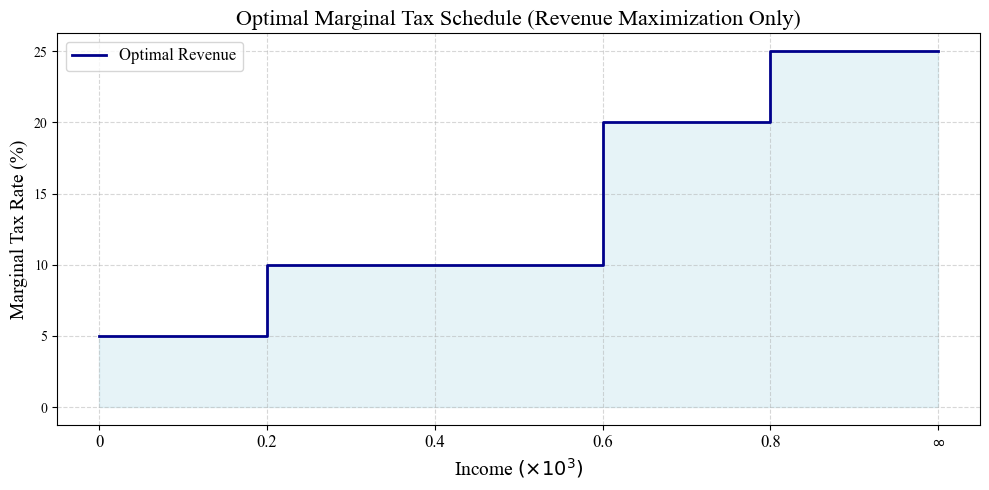

In [ ]:
# Load learned policy from training output
with open("runs/default/final_policy.txt", "r") as f:
    policy = tuple(float(x) for x in f.read().strip().split(","))

# Use same bracket labels and style as your notebook
income_brackets = [0, 0.2, 0.4, 0.6, 0.8]
income_brackets_extended = income_brackets + [1.0]
tax_rates_learned = [int(round(p*100)) for p in policy]  # convert to %
tax_rates_extended = tax_rates_learned + [tax_rates_learned[-1]]

plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(10, 5))
ax.step(income_brackets_extended, tax_rates_extended, where='post',
        color='darkblue', linewidth=2, label='Learned Policy')
ax.fill_between(income_brackets_extended, 0, tax_rates_extended, step='post',
                color='lightblue', alpha=0.3)
ax.set_xticks(income_brackets_extended)
ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '∞'], fontsize=12)
ax.set_xlabel('Income (×10³)', fontsize=14)
ax.set_ylabel('Marginal Tax Rate (%)', fontsize=14)
ax.set_title('Optimal Marginal Tax Schedule (Learned)', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

----